# 1) Prerequisites
### Importing packages, defining functions, downloading and moving the data...

In [12]:
# %run basic_functions.py ### This contains the getcitibikedata function.
import pandas as pd
import os
import matplotlib.pyplot as plt

os.environ['PUIDATA']='/nfshome/tn1050/PUI2018/PUIdata'

In [ ]:
! month=201709
! curl https://s3.amazonaws.com/tripdata/$month-citibike-tripdata.csv.zip >> $PUIDATA/$month-citibike-tripdata.csv.zip
! unzip $PUIDATA/$month-citibike-tripdata.csv.zip

# 2) IDEA
During a weekday, people who are subscribed to the citibike use it as their choice of daily commute. Therefore I am expecting subscribed users use the citibike more during the weekday rather than the weekend in this month of September 2018, a very recent year I chose and a month where the fall term has begun and most schools have already started.
###  Null Hypothesis:
The ratio of subscribed users will be the same or lower during the weekdays compared to ratio of subscribed users in the weekends. <br>
## _$H_0$_ : $\frac{U_{\mathrm{subscribed,weekend}}}{U_{\mathrm{total,weekend}}} >= \frac{U_{\mathrm{subscribed,weekday}}}{U_{\mathrm{total,weekday}}}$
### Alternative Hypothesis:
The ratio of subscribed users will be higher during the weekdays compared to ratio of subscribed users in the weekends. <br>
## _$H_1$_ : $\frac{U_{\mathrm{subscribed,weekend}}}{U_{\mathrm{total,weekend}}} < \frac{U_{\mathrm{subscribed,weekday}}}{U_{\mathrm{total,weekday}}}$

<br><br><br>
### 3) Read Data

In [9]:
df_201709=pd.read_csv(os.getenv('PUIDATA')+'/201709-citibike-tripdata.csv')

In [10]:
df_201709.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,3331,Riverside Dr & W 104 St,40.801343,-73.971146,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,14530,Subscriber,1993.0,1
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,3101,N 12 St & Bedford Ave,40.720798,-73.954847,3100,Nassau Ave & Newell St,40.724813,-73.947526,15475,Subscriber,1988.0,1
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,3140,1 Ave & E 78 St,40.771404,-73.953517,3141,1 Ave & E 68 St,40.765005,-73.958185,30346,Subscriber,1969.0,1
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,236,St Marks Pl & 2 Ave,40.728419,-73.987140,473,Rivington St & Chrystie St,40.721101,-73.991925,28056,Subscriber,1993.0,1
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,3427,Lafayette St & Jersey St,40.724305,-73.996010,3431,E 35 St & 3 Ave,40.746524,-73.977885,25413,Subscriber,1987.0,1


In [4]:
df_201709.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'age'],
      dtype='object')

### 4) Preprocess Data

In [43]:
df=df_201709[['starttime', 'usertype']]
df['starttime'] = pd.to_datetime(df['starttime'])
df['day-of-week'] = df['starttime'].dt.weekday_name
df.drop(['starttime'], axis=1, inplace=True)
df.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to b

,usertype,day-of-week
0,Subscriber,Friday
1,Subscriber,Friday
2,Subscriber,Friday
3,Subscriber,Friday
4,Subscriber,Friday


In [47]:
df_grouped = df.groupby('day-of-week').count()
df_grouped.columns=['total-user']
df_grouped['subscribed']=df[df['usertype']=='Subscriber'].groupby('day-of-week').count()
df_grouped['customers']=df[df['usertype']=='Customer'].groupby('day-of-week').count()

In [48]:
df_grouped

,total-user,subscribed,customers
day-of-week,,,
Friday,334056,301192,32864
Monday,260532,224738,35794
Saturday,271843,211906,59937
Sunday,209091,162180,46911
Thursday,280215,258263,21952
Tuesday,269453,248686,20767
Wednesday,252908,236144,16764


In [55]:
# Since the day-of-week cannot be sorted naturally, this cell is to sort the data 
# by its day of week starting from Monday as the first day of the week.
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

df_grouped['day-id'] = df_grouped.index
df_grouped['day-id'] = df_grouped['day-id'].map(sorterIndex)
df_grouped=df_grouped.sort_values('day-id')

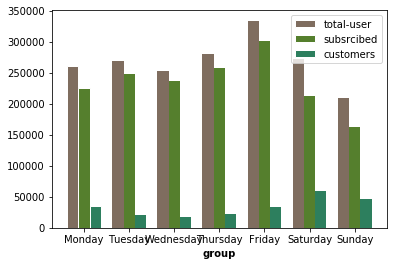

In [56]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = df_grouped['total-user']
bars2 = df_grouped['subscribed']
bars3 = df_grouped['customers']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='total user')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='subsrcibed')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='customers')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], df_grouped.index)
 
# Create legend & Show graphic
plt.legend()
plt.show()


In [68]:
df_stat=df_grouped
df_stat['subs-ratio']=df_stat['subscribed']/df_stat['total-user']
df_stat['cust-ratio']=df_stat['customers']/df_stat['total-user']
df_stat

,total-user,subscribed,customers,day-id,subs-ratio,cust-ratio
day-of-week,,,,,,
Monday,260532,224738,35794,0,0.862612,0.137388
Tuesday,269453,248686,20767,1,0.922929,0.077071
Wednesday,252908,236144,16764,2,0.933715,0.066285
Thursday,280215,258263,21952,3,0.921660,0.078340
Friday,334056,301192,32864,4,0.901621,0.098379
Saturday,271843,211906,59937,5,0.779516,0.220484
Sunday,209091,162180,46911,6,0.775643,0.224357


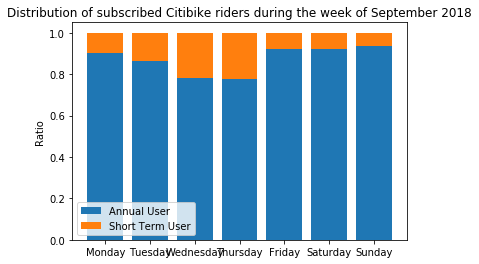

In [69]:
p1=plt.bar(df_stat.index, df_stat['subs-ratio'])
p2=plt.bar(df_stat.index, df_stat['cust-ratio'], bottom=df_stat['subs-ratio'])

plt.ylabel('Ratio')
plt.title('Distribution of subscribed Citibike riders during the week of September 2018')
plt.xticks(df_stat['day-id'], df_stat.index)
plt.legend((p1[0], p2[0]), ('Annual User', 'Short Term User'))

plt.show()